<a href="https://colab.research.google.com/github/jdasam/mas1004-2022/blob/main/notebooks/Data_AI_3rd_week_spiral_livecoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
# we will use torch and numpy
# torch is a module name PyTorch
# torch is our main library for making neural network
# numpy is very good at handling matrix or n-dim array
# You can replace almost everything of numpy with torch
import torch
import numpy as np # from this namespace, we can call numpy as just np
from math import pi

In [ ]:
# if you run this code in your local computer, you have to check that torch is installed
!pip install torch
# But in Google Colab, torch is already installed 

In [3]:
# make spiral data
# https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5

# You don't have to understand this part
N = 500
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

# this makes a numpy Array of spiral data with two different classes
# Array is like a matrix, but it can have any dimensional 
# You can replace np.Array with torch.Tensor 

In [5]:
res

# each row represents a single data point
# each column represents a different feature of a single data point
# feature means characteristics of data in numeric value 
  # 0th column represetns x position
  # 1st column represents y position
  # 2nd column represents a category index
  # For this specific Array  

array([[ 15.43847731,  -1.57746553,   0.        ],
       [ -5.50845968,  -9.40130395,   0.        ],
       [-15.06159921,   1.827937  ,   1.        ],
       ...,
       [  9.19628481,  -9.49614252,   0.        ],
       [ -9.06987306,  -6.91993835,   0.        ],
       [ -7.46658868,  -8.68801622,   0.        ]])

In [6]:
# shape is an attribute of Array or Tensor
# that shows the number of features in each dimension (or axis)
res.shape

(1000, 3)

In [10]:
# what is the meaning of each axis?
print(res[0], res[0].shape) # indexing in 0-th axis

[15.43847731 -1.57746553  0.        ] (3,)


In [12]:
# what happens if we index by 1st-axis
res[:50, 0] # : means entire range 
# because we are using : in the 0th position of slicing index
# (res[a, b]). a means index for 0-th axis, and be means index for 1-st axis 
# this line select every element in a 0th-axis, and select 0th element in 1st-dimension

array([ 15.43847731,  -5.50845968, -15.06159921,  -4.23780571,
        -8.2382565 ,  16.4561751 ,  15.76867952,   4.84864512,
        13.35029581,  -8.06583584,   8.96429724,  -9.13670488,
       -10.85576465,   2.88488267,  -1.32155033,   8.64747077,
        -6.21642216,   9.78747748,   9.00728495, -10.4860074 ,
        -4.14308029,  -1.78364523,   8.20229983,   4.67095082,
         4.43680897,   4.91596614,   1.26902714,  14.2763786 ,
       -12.57100772,   9.98672799,  14.84442402,  -8.36399529,
         7.94834121,   3.44712174,  -9.04511068, -12.88069921,
       -11.49728209,  -4.24716195,   2.37048009,  -2.35319585,
        -4.01246933,  -6.68415519,  -9.47394311,  -5.09692157,
       -14.03845641, -11.3270201 ,   7.1158049 ,  -0.94471088,
         6.3024538 ,  -6.59684659])

In [ ]:
# What should we do to select the last column of every row?
res[:, 2] # : means every row, and 2 means 2nd column (last column)

In [ ]:
res[:, -1] # As same as list slicing, you can select idx from the backward

In [18]:
# How can we select rows that have value 1 for its last column?
# How can we select data points of which category value is 1

# Let's try to check whether the datapoint's value is 1 or not
is_category1 = res[:, -1] == 1
# This will returns an Array of Boolean (True or False) value 
# for each datasample (row) in the dataset (res)

In [19]:
# Then, can we select datasamples that have category value of 1?
res[is_category1]

array([[-15.06159921,   1.827937  ,   1.        ],
       [ -8.2382565 ,   9.23541357,   1.        ],
       [  4.84864512,  -4.75083974,   1.        ],
       ...,
       [  4.57875454,   9.43026788,   1.        ],
       [  2.79598029,  -6.66249218,   1.        ],
       [  5.8947596 ,  -4.93096887,   1.        ]])

In [21]:
# Then, how can we select datasamples that have category value of 0?
is_category0 = res[:, -1] == 0
res[is_category0]

array([[15.43847731, -1.57746553,  0.        ],
       [-5.50845968, -9.40130395,  0.        ],
       [-4.23780571,  4.65019506,  0.        ],
       ...,
       [ 9.19628481, -9.49614252,  0.        ],
       [-9.06987306, -6.91993835,  0.        ],
       [-7.46658868, -8.68801622,  0.        ]])

In [25]:
# if we know that there are only two categories, 
# you don't have to compute it again
# Because if it is not category1, it is automatically category0
print(~is_category1) # ~ means not
res[~is_category1] # select datasamples that are not is_category1

[ True  True False  True False  True  True False  True  True False False
 False  True False False  True  True False  True  True  True False False
  True False  True  True False False  True False  True False  True False
 False  True False False False False  True  True False False False False
  True  True  True  True  True False  True False False  True False False
  True  True  True False False False  True  True False  True  True  True
 False  True False False  True False  True  True  True False False  True
  True False  True  True False  True  True False  True  True False False
  True False  True  True False False False False  True False False False
  True  True False False False  True  True  True  True  True False False
 False  True  True  True  True False False False False  True False  True
 False False  True  True  True False False  True  True False False False
  True False  True  True  True  True False  True  True  True False  True
 False  True False False False False False False  T

array([[15.43847731, -1.57746553,  0.        ],
       [-5.50845968, -9.40130395,  0.        ],
       [-4.23780571,  4.65019506,  0.        ],
       ...,
       [ 9.19628481, -9.49614252,  0.        ],
       [-9.06987306, -6.91993835,  0.        ],
       [-7.46658868, -8.68801622,  0.        ]])

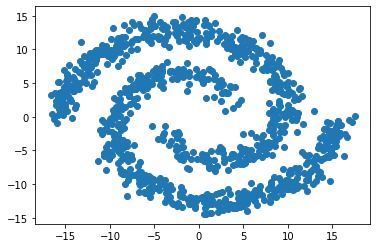

In [16]:
import matplotlib.pyplot as plt # default library for visualizing in Python
plt.scatter(res[:,0], res[:, 1])

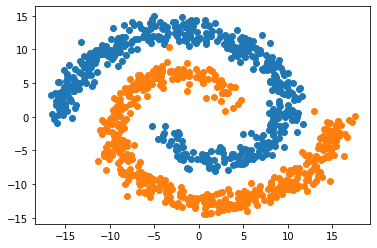

In [26]:
# this will be plotted with blue
plt.scatter(res[is_category1,0], res[is_category1, 1])

# this will be plotted with orange
plt.scatter(res[~is_category1,0], res[~is_category1, 1])

# if you plot several plots in a single figure of plt
# it automatically select different colors

In [ ]:
# Get x positions of first 100 samples from res
first_100_samples_xpos = res[:100, 0]

In [34]:
# Get datasamples of which y position is larger than 0
# upper_datas = res[res[:,1]>0, :]
# split it as
is_upper = res[:, 1] > 0
upper_datas = res[is_upper]
upper_datas

array([[-15.06159921,   1.827937  ,   1.        ],
       [ -4.23780571,   4.65019506,   0.        ],
       [ -8.2382565 ,   9.23541357,   1.        ],
       ...,
       [ 10.05385196,   3.22562757,   1.        ],
       [  5.35556216,  10.93862818,   1.        ],
       [  4.57875454,   9.43026788,   1.        ]])

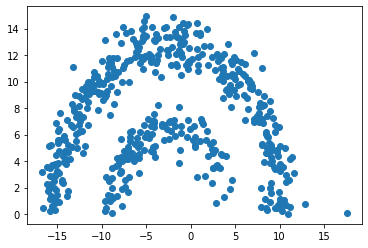

In [33]:
# Explanation on Scatter
# plt scatter takes two inputs (at_least)
# 0th input is a list of (or array of) x position
# 1st input is a list of (or array of) y position
plt.scatter(x=upper_datas[:,0], y=upper_datas[:, 1])


In [27]:
res_t = torch.Tensor(res)

In [28]:
res_t[res_t[:,2]==0, :] 
# Slicing of tensor is exactly same with slicing of Array

tensor([[15.4385, -1.5775,  0.0000],
        [-5.5085, -9.4013,  0.0000],
        [-4.2378,  4.6502,  0.0000],
        ...,
        [ 9.1963, -9.4961,  0.0000],
        [-9.0699, -6.9199,  0.0000],
        [-7.4666, -8.6880,  0.0000]])